# Load the Three Datasets

In [ ]:
import pandas as pd

# Load the CSV Files
transactions_df = pd.read_csv ("transactions_data.csv")
products_df = pd.read_csv ("products_data.csv")
customers_df = pd.read_csv ("customers_data.csv")

# Display datasets
print("Transactions Data:\n", transactions_df.head(), "\n\n")
print("Products Data:\n", products_df.head(), "\n\n")
print("Customers Data:\n", customers_df.head(), "\n\n")

Transactions Data:
    Unnamed: 0  Transaction_ID  Company_ID  Product_ID  Quantity  \
0         0.0             1.0        88.0         6.0       NaN   
1         1.0             2.0        29.0        19.0      16.0   
2         2.0             NaN        28.0        18.0       6.0   
3         3.0             4.0        85.0        12.0      12.0   
4         4.0             5.0        47.0         3.0       8.0   

  Transaction_Date  Product_Price  Total_Cost  
0       2024/03/26  194379.147964   1075200.0  
1    July 09, 2024   97930.993380   1428000.0  
2       04/13/2024  126095.547778    940800.0  
3       09-06-2023            NaN   1008000.0  
4       07/06/2021   99575.609634    705600.0   


Products Data:
    Product_ID            Product_Name Product_Price
0         1.0      FinPredictor Suite      ?140,000
1         2.0  MarketMinder Analytics      ?168,000
2         3.0    TrendWise Forecaster      ?100,800
3         4.0  CustomerScope Insights      ?123,200
4         

# Check Missing and Duplicates

In [ ]:
# Check for missing values
print("Missing Values:\n")
print("Transactions Data:\n", transactions_df.isnull().sum(), "\n")
print("Products Data:\n", products_df.isnull().sum(), "\n")
print("Customers Data:\n", customers_df.isnull().sum(), "\n")

print("="*50, "\n")

# Check for duplicate rows
print("Duplicate Rows Count:\n")
print("Transactions Data:", transactions_df.duplicated().sum())
print("Products Data:", products_df.duplicated().sum())
print("Customers Data:", customers_df.duplicated().sum())

Missing Values:

Transactions Data:
 Unnamed: 0          1000
Transaction_ID      1000
Company_ID          1000
Product_ID          1000
Quantity            1000
Transaction_Date       0
Product_Price       1000
Total_Cost          1000
dtype: int64 

Products Data:
 Product_ID       2
Product_Name     0
Product_Price    0
dtype: int64 

Customers Data:
 Company_ID        10
Company_Name       0
Company_Profit    12
Address            0
dtype: int64 


Duplicate Rows Count:

Transactions Data: 0
Products Data: 0
Customers Data: 0


# Handle Missing Values and Fix Formats

In [ ]:
from dateutil import parser


# <=== Clean the Products_Data ====>
#Remove Currency Symbols and Convert `Product_Price` to Numeric
products_df['Product_Price'] = products_df['Product_Price'].replace('[^\d.]', '', regex=True).astype(float)

# Fill missing Product_IDs based on the previous available ID in sequence
products_df['Product_ID'] = products_df['Product_ID'].interpolate(method='linear').astype(int)


# <=== Handle Mixed Date Formats Transaction_Date====>
# Function to parse mixed date formats
def parse_mixed_dates(date):
    try:
        return parser.parse(date, dayfirst=False)  # Automatically detects format
    except:
        return pd.NaT  # Handle invalid cases

# Apply function to each date
transactions_df['Transaction_Date'] = transactions_df['Transaction_Date'].apply(parse_mixed_dates)

# Standardize format to YYYY-MM-DD
transactions_df['Transaction_Date'] = transactions_df['Transaction_Date'].dt.strftime('%Y-%m-%d')

# Convert back to datetime64 data type
transactions_df['Transaction_Date'] = pd.to_datetime(transactions_df['Transaction_Date'])

# Drop the 'Unnamed: 0' column (index column)
transactions_df = transactions_df.drop(columns=['Unnamed: 0'])

# Fill missing Transaction_IDs based on the previous available ID in sequence
transactions_df['Transaction_ID'] = transactions_df['Transaction_ID'].interpolate(method='linear').astype(int)


#<==== Customers_Data =====>
# Fill missing Company_IDs based on the previous available ID in sequence
customers_df['Company_ID'] = customers_df['Company_ID'].interpolate(method='linear').astype(int)

print("Missing values: \n")
print("Transactions Data:\n", transactions_df.isnull().sum(), "\n")
print("Products Data:\n", products_df.isnull().sum(), "\n")
print("Customers Data:\n", customers_df.isnull().sum(), "\n")

Missing values: 

Transactions Data:
 Transaction_ID         0
Company_ID          1000
Product_ID          1000
Quantity            1000
Transaction_Date       0
Product_Price       1000
Total_Cost          1000
dtype: int64 

Products Data:
 Product_ID       0
Product_Name     0
Product_Price    0
dtype: int64 

Customers Data:
 Company_ID         0
Company_Name       0
Company_Profit    12
Address            0
dtype: int64 



Remove Currency Symbols then convert the column to `float` type to ensure the data can be used in calculations, like summing or averaging. Handle Mixed Date Formats in `Transaction_Date`
- We define a function `parse_mixed_dates()` that tries to parse each date using the `dateutil.parser.parse()` function.
- `parser.parse()` is highly flexible and can handle various date formats. We set `dayfirst=False` because some dates might be in the 'MM/DD/YYYY' format.

Converting the datatype to datetime, Pandas will automatically store it in YYYY-MM-DD format.
Finally, we check the data types of all DataFrames and print the first few rows to confirm the changes and ensure everything is correct.


# Merge Datasets

In [ ]:
# Merge Transactions with Products on 'Product_ID'
merged_df = transactions_df.merge(products_df, on='Product_ID', how='left')

# Merge the result with Customers on 'Company_ID'
merged_df = merged_df.merge(customers_df, on='Company_ID', how='left')

# Convert ID columns to string
merged_df['Transaction_ID'] = merged_df['Transaction_ID'].astype(str)
merged_df['Company_ID'] = merged_df['Company_ID'].astype(str)
merged_df['Product_ID'] = merged_df['Product_ID'].astype(str)

# Verify the merged dataset
print("Merged Dataset:\n", merged_df.dtypes, "\n")
print(merged_df.head())

Merged Dataset:
 Transaction_ID              object
Company_ID                  object
Product_ID                  object
Quantity                   float64
Transaction_Date    datetime64[ns]
Product_Price_x            float64
Total_Cost                 float64
Product_Name                object
Product_Price_y            float64
Company_Name                object
Company_Profit             float64
Address                     object
dtype: object 

  Transaction_ID Company_ID Product_ID  Quantity Transaction_Date  \
0              1       88.0        6.0       NaN       2024-03-26   
1              2       29.0       19.0      16.0       2024-07-09   
2              3       28.0       18.0       6.0       2024-04-13   
3              4       85.0       12.0      12.0       2023-09-06   
4              5       47.0        3.0       8.0       2021-07-06   

   Product_Price_x  Total_Cost            Product_Name  Product_Price_y  \
0    194379.147964   1075200.0    RevenueVue Dashboard   

First Merge (transactions_df + products_df): joins transaction data with product details based on Product_ID.
Second Merge (merged_df + customers_df): Joins the result with customer details using Company_ID.
Final Verification to ensures data types are correct and display few rows of the merged data.


# Fix Columns of Merged Dataset

In [ ]:
# Drop the unnecessary 'Product_Price_x' column
merged_df = merged_df.drop(columns=['Product_Price_x'])

# Rename 'Product_Price_y' to 'Product_Price'
merged_df = merged_df.rename(columns={'Product_Price_y': 'Product_Price'})

# Define the desired column order
desired_column_order = ['Transaction_ID', 'Company_ID', 'Product_ID', 'Transaction_Date', 'Product_Price', 'Quantity', 'Total_Cost', 'Product_Name', 'Company_Name', 'Company_Profit', 'Address']

# Re-arrange the columns based on the desired order
merged_df = merged_df[desired_column_order]

# Verify the changes
print("Updated Columns:", merged_df.columns)
merged_df

Updated Columns: Index(['Transaction_ID', 'Company_ID', 'Product_ID', 'Transaction_Date',
       'Product_Price', 'Quantity', 'Total_Cost', 'Product_Name',
       'Company_Name', 'Company_Profit', 'Address'],
      dtype='object')


,Transaction_ID,Company_ID,Product_ID,Transaction_Date,Product_Price,Quantity,Total_Cost,Product_Name,Company_Name,Company_Profit,Address
0,1,88.0,6.0,2024-03-26,179200.0,NaN,1075200.0,RevenueVue Dashboard,Elite Consulting 88,75950.0,"EDSA, Barangay 456, Taguig, Philippines"
1,2,29.0,19.0,2024-07-09,95200.0,16.0,1428000.0,EcoNomix Modeler,Sky Industries 29,61952.0,"Edsa, brgy. 606, makati, philippines!"
2,3,28.0,18.0,2024-04-13,134400.0,6.0,940800.0,DashSync Analytics Hub,Global Holdings 28,61115.0,"Katipunan Ave, Brgy. 303, Taguig, Philippines"
3,4,85.0,12.0,2023-09-06,84000.0,12.0,1008000.0,BudgetMaster Pro,Green Ventures 85,113470.0,"EDSA, Barangay 707, Cebu City, Philippines"
4,5,47.0,3.0,2021-07-06,100800.0,8.0,705600.0,TrendWise Forecaster,Green Industries 47,31130.0,"Taft Ave, Barangay 707, Mandaluyong, Philippines"
...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,nan,10.0,2022-06-05,89600.0,NaN,627200.0,SegmentX Targeting,NaN,NaN,NaN
9996,9997,39.0,2.0,2021-05-17,168000.0,9.0,1512000.0,MarketMinder Analytics,Prime Consulting 39,107255.0,"Ortigas Ave, Barangay 606, Davao City, Philipp..."
9997,9998,90.0,1.0,2022-07-19,140000.0,15.0,1960000.0,FinPredictor Suite,Prime Holdings 90,46225.0,"EDSA, Barangay 202, Parañaque, Philippines"
9998,9999,33.0,nan,2021-04-15,NaN,19.0,1680000.0,NaN,Green Consulting 33,52003.0,"Shaw blvd, barangay 707, mandaluyong, philippi..."


Cleans up redundant columns (Product_Price_x).
- Product_Price_x is the Product_Price in Transactions_Data that contains mismatched values.

Standardizes column names (Product_Price_y → Product_Price).
Reorders columns for clarity and logical flow.
Ensures the dataset is well-structured before further analysis or saving.


# Ensure that merged_df have valid features

In [ ]:
import numpy as np
from scipy.spatial import KDTree

#Handling incorrect product pricing information in the merged_df dataset by finding and assigning the nearest available price from the products_df dataset.

# Build a KDTree for a fast nearest-neighbor search
product_prices = products_df[['Product_Price']].dropna().values.flatten()
product_tree = KDTree(product_prices.reshape(-1, 1))

def find_nearest_price(price):
    if np.isnan(price):
        return None  # Skip NaN prices
    _, index = product_tree.query([[price]])  # Find nearest match
    return products_df.iloc[index[0]]  # Return the closest product entry

# Apply the function to update merged_df
for index, row in merged_df.iterrows():
    if np.isnan(row['Product_Price']) or row['Product_Price'] not in product_prices:
        nearest_product = find_nearest_price(row['Product_Price'])

        if nearest_product is not None:
            merged_df.at[index, 'Product_Price'] = nearest_product['Product_Price']
            merged_df.at[index, 'Product_ID'] = nearest_product['Product_ID']
            merged_df.at[index, 'Product_Name'] = nearest_product['Product_Name']

# Fill missing Product_ID based on corresponding Product_Price
price_to_product_id = products_df.set_index('Product_Price')['Product_ID'].to_dict()

# Apply the mapping to fill missing Product_IDs
merged_df['Product_ID'] = merged_df.apply(
    lambda row: price_to_product_id.get(row['Product_Price'], row['Product_ID']), axis=1
)



#<===== Calculations ====>

# Only calculate Total_Cost if both Product_Price and Quantity are not missing
merged_df['Total_Cost'] = merged_df.apply(
    lambda row: row['Product_Price'] * row['Quantity'] if pd.notnull(row['Product_Price']) and pd.notnull(row['Quantity']) else row['Total_Cost'],
    axis=1
)

# Fill missing Quantity: Total_Cost / Product_Price (only if both are non-null)
merged_df['Quantity'] = merged_df['Quantity'].fillna(merged_df['Total_Cost'] / merged_df['Product_Price'].replace(0, np.nan))

# Fill missing Product_Price: Total_Cost / Quantity (only if both are non-null)
merged_df['Product_Price'] = merged_df['Product_Price'].fillna(merged_df['Total_Cost'] / merged_df['Quantity'].replace(0, np.nan))


merged_df

,Transaction_ID,Company_ID,Product_ID,Transaction_Date,Product_Price,Quantity,Total_Cost,Product_Name,Company_Name,Company_Profit,Address
0,1,88.0,6,2024-03-26,179200.000000,6.0,1075200.0,RevenueVue Dashboard,Elite Consulting 88,75950.0,"EDSA, Barangay 456, Taguig, Philippines"
1,2,29.0,19,2024-07-09,95200.000000,16.0,1523200.0,EcoNomix Modeler,Sky Industries 29,61952.0,"Edsa, brgy. 606, makati, philippines!"
2,3,28.0,18,2024-04-13,134400.000000,6.0,806400.0,DashSync Analytics Hub,Global Holdings 28,61115.0,"Katipunan Ave, Brgy. 303, Taguig, Philippines"
3,4,85.0,12,2023-09-06,84000.000000,12.0,1008000.0,BudgetMaster Pro,Green Ventures 85,113470.0,"EDSA, Barangay 707, Cebu City, Philippines"
4,5,47.0,15,2021-07-06,100800.000000,8.0,806400.0,TrendWise Forecaster,Green Industries 47,31130.0,"Taft Ave, Barangay 707, Mandaluyong, Philippines"
...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,nan,10,2022-06-05,89600.000000,7.0,627200.0,SegmentX Targeting,NaN,NaN,NaN
9996,9997,39.0,17,2021-05-17,168000.000000,9.0,1512000.0,MarketMinder Analytics,Prime Consulting 39,107255.0,"Ortigas Ave, Barangay 606, Davao City, Philipp..."
9997,9998,90.0,1,2022-07-19,140000.000000,15.0,2100000.0,FinPredictor Suite,Prime Holdings 90,46225.0,"EDSA, Barangay 202, Parañaque, Philippines"
9998,9999,33.0,nan,2021-04-15,88421.052632,19.0,1680000.0,NaN,Green Consulting 33,52003.0,"Shaw blvd, barangay 707, mandaluyong, philippi..."


Ensures that all transactions in merged_df have valid product pricing, avoiding incomplete or incorrect financial calculations.

- When a price is updated, the corresponding Product_ID and Product_Name are also updated to maintain data integrity.

Fill in missing Product_ID based on the corresponding Product_Price (it is only because product prices are unique or have no similar values)
Creating formulae to fill in some missing values


# Handling the Remaining Missing Values of merged_df

In [ ]:
# Replace missing categorical values with 'Unknown'
merged_df['Company_ID'] = merged_df['Company_ID'].fillna('Unknown')
merged_df['Product_Name'] = merged_df['Product_Name'].fillna('Unknown')
merged_df['Company_Name'] = merged_df['Company_Name'].fillna('Unknown')
merged_df['Address'] = merged_df['Address'].fillna('Unknown')
merged_df['Company_Profit'] = merged_df['Company_Profit'].fillna('Unknown')
merged_df['Product_ID'] = merged_df['Product_ID'].fillna('Unknown Product')

# Replace 'nan' strings with actual NaN
merged_df = merged_df.replace('nan', np.nan)

# Check for missing values
missing_values = merged_df.isnull().sum()
print("Updated Missing Values Count:")
print(missing_values)

Updated Missing Values Count:
Transaction_ID        0
Company_ID            0
Product_ID            0
Transaction_Date      0
Product_Price       229
Quantity            194
Total_Cost          214
Product_Name          0
Company_Name          0
Company_Profit        0
Address               0
dtype: int64


# Check for Skewness and Statistics of merged_df

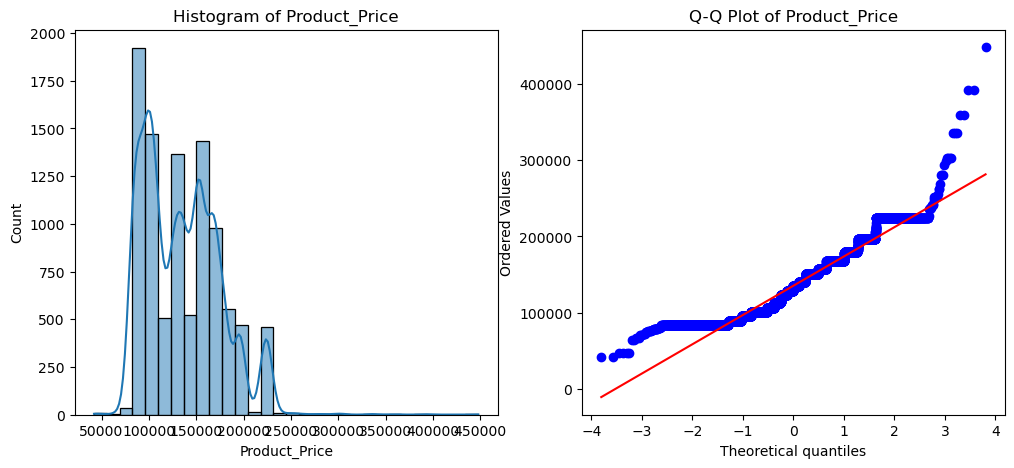

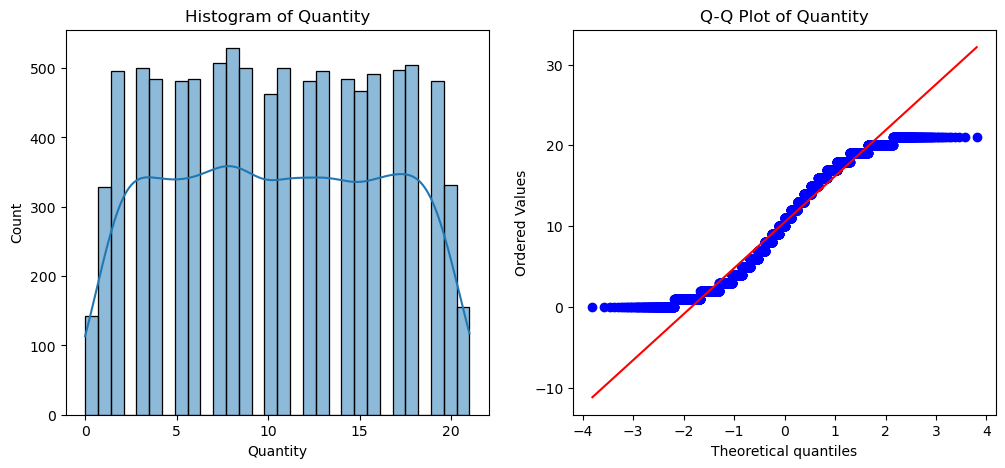

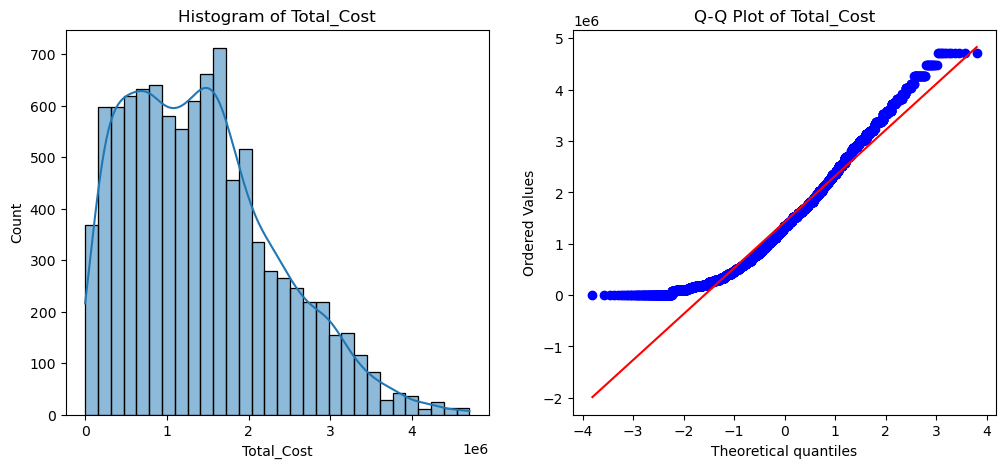

Skewness of columns with missing values:
Product_Price: 0.70
Quantity: 0.01
Total_Cost: 0.67

Statistical Description of Dataset:
       Product_Price     Quantity    Total_Cost
count    9771.000000  9806.000000  9.786000e+03
mean   135220.554152    10.497247  1.420691e+06
std     39622.680696     5.806724  9.133881e+05
min     42000.000000     0.000000  0.000000e+00
25%    100800.000000     6.000000  6.720000e+05
50%    134400.000000    10.000000  1.344000e+06
75%    168000.000000    16.000000  1.971200e+06
max    448000.000000    21.000000  4.704000e+06

Suggested Imputation Method for Missing Values:
Product_Price: Replace missing values with Median
Quantity: Replace missing values with Mean
Total_Cost: Replace missing values with Median


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, probplot

# Select only columns with missing values
missing_cols = ['Product_Price', 'Quantity', 'Total_Cost']

# Check skewness of each column
skewness_results = {}
for col in missing_cols:
    skew_value = skew(merged_df[col].dropna())  # Drop NaN before calculating skewness
    skewness_results[col] = skew_value

    # Plot Histogram and Q-Q Plot
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    sns.histplot(merged_df[col].dropna(), kde=True, bins=30)
    plt.title(f'Histogram of {col}')

    plt.subplot(1, 2, 2)
    probplot(merged_df[col].dropna(), dist="norm", plot=plt)
    plt.title(f'Q-Q Plot of {col}')

    plt.show()

# Display skewness values
print("Skewness of columns with missing values:")
for col, skew_value in skewness_results.items():
    print(f"{col}: {skew_value:.2f}")

# Statistical Summary of Dataset
stats_summary = merged_df.describe()
print("\nStatistical Description of Dataset:")
print(stats_summary)

# Suggest imputation method
imputation_suggestions = {}
for col, skew_value in skewness_results.items():
    if -0.5 <= skew_value <= 0.5:
        imputation_suggestions[col] = "Replace missing values with Mean"
    else:
        imputation_suggestions[col] = "Replace missing values with Median"

print("\nSuggested Imputation Method for Missing Values:")
for col, suggestion in imputation_suggestions.items():
    print(f"{col}: {suggestion}")


# Missing are Found. Handle missing values in merged_df

In [ ]:
# Fill missing Product_Price with Median
median_price = merged_df['Product_Price'].median()
merged_df['Product_Price'].fillna(median_price, inplace=True)

# Fill missing Quantity with Median (since it represents a discrete count)
median_quantity = merged_df['Quantity'].median()
merged_df['Quantity'].fillna(median_quantity, inplace=True)


# Recalculate missing Total_Cost
merged_df['Total_Cost'] = merged_df['Total_Cost'].fillna(merged_df['Product_Price'] * merged_df['Quantity'])

# Verify missing values again
missing_values_after = merged_df.isnull().sum()
print("Missing Values After Imputation:")
print(missing_values_after)

Missing Values After Imputation:
Transaction_ID      0
Company_ID          0
Product_ID          0
Transaction_Date    0
Product_Price       0
Quantity            0
Total_Cost          0
Product_Name        0
Company_Name        0
Company_Profit      0
Address             0
dtype: int64


# Data Visualizations

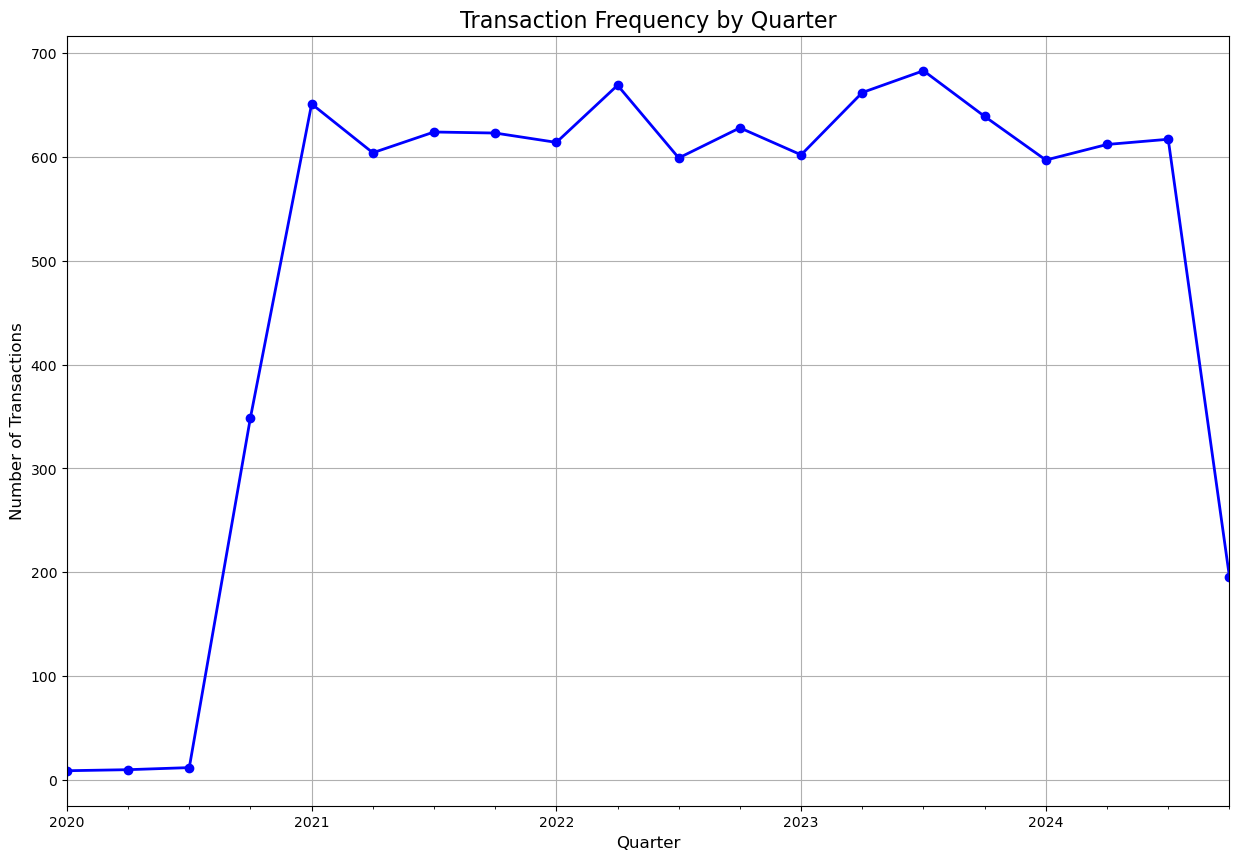

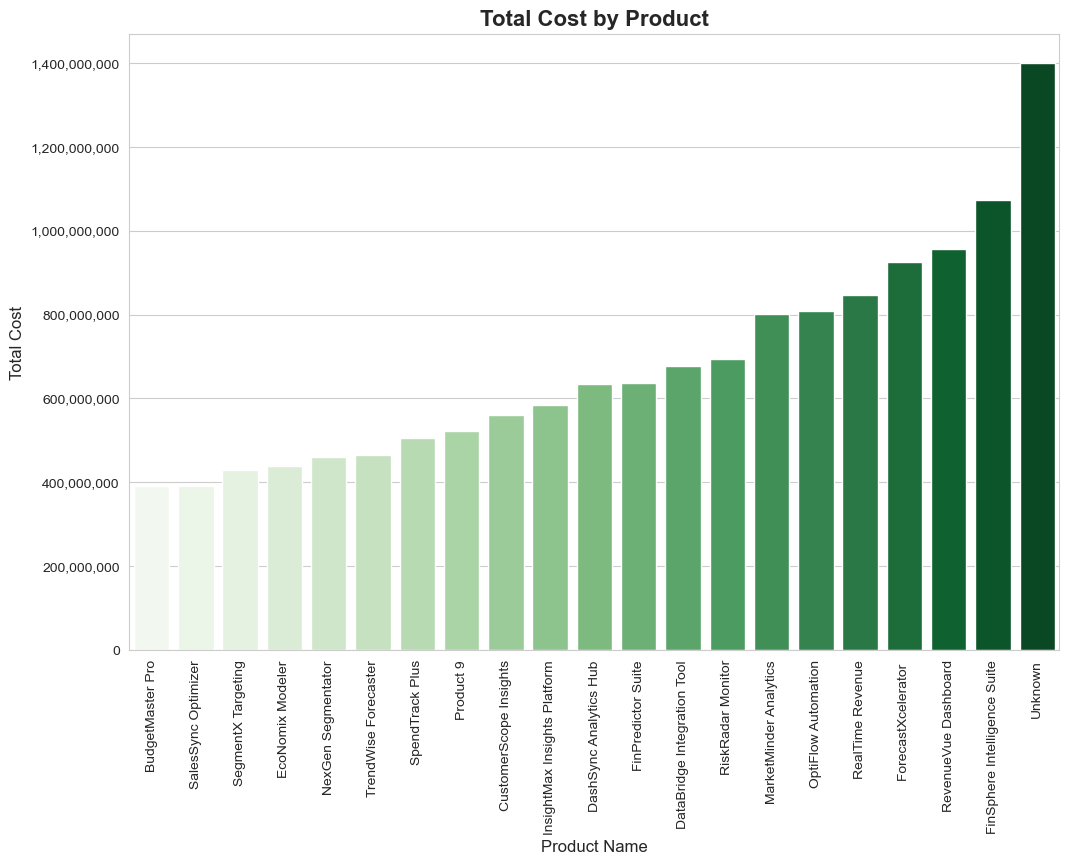

In [ ]:
# Set the size of the plot
plt.figure(figsize=(15, 10))

# Ensure Transaction_Date is in datetime format
merged_df['Transaction_Date'] = pd.to_datetime(merged_df['Transaction_Date'])

# Group by quarters and count the number of transactions per quarter
transaction_counts_quarterly = merged_df.resample('Q', on='Transaction_Date').size()

# Line plot for transaction counts over time (quarterly)
transaction_counts_quarterly.plot(kind='line', color='blue', marker='o', linestyle='-', linewidth=2)

# Add titles and labels
plt.title('Transaction Frequency by Quarter', fontsize=16)
plt.xlabel('Quarter', fontsize=12)
plt.ylabel('Number of Transactions', fontsize=12)
plt.grid(True)
plt.show()


# <==== Data Visualization for Total Cost by Product ====>

import matplotlib.ticker as mtick

# Set seaborn style
sns.set_style("whitegrid")

# Aggregate Total_Cost per Product_Name and sort in ascending order
total_cost_per_product = merged_df.groupby('Product_Name')['Total_Cost'].sum().sort_values(ascending=True)

# Set the figure size
plt.figure(figsize=(12, 8))

# Create the bar plot
ax = sns.barplot(x=total_cost_per_product.index, y=total_cost_per_product.values, palette='Greens')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Formatting the y-axis to remove decimal places and add thousand separators
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x):,}'))

# Add titles and labels
plt.title('Total Cost by Product', fontsize=16, fontweight='bold')
plt.xlabel('Product Name', fontsize=12)
plt.ylabel('Total Cost', fontsize=12)

# Show the plot
plt.show()


The data shows the total cost distribution across various products, revealing key insights:

- BudgetMaster Pro has the lowest total cost (₱391,188,000), suggesting lower usage or lower unit pricing.
- FinSphere Intelligence Suite has the highest total cost (₱1,140,832,000), indicating high demand, premium pricing, or frequent transactions.
- Unknown entries total ₱707,834,400, which may indicate missing or unclassified product data.
- The majority of products fall within the ₱400M - ₱900M range, with a gradual increase towards the top-performing products.


In [ ]:
import os

# Save the final cleaned dataset to a CSV file
merged_df.to_csv('Initial_merged_dataset(1).csv', index=False)


file_path = "Initial_merged_dataset(1).csv"
if os.path.exists(file_path):
    print("File saved successfully!")
else:
    print("File was not saved.")

File saved successfully!


# Feature Engineering

In [ ]:
# Load the dataset
data = pd.read_csv('Initial_merged_dataset(1).csv')

# 1. Transactions Data - Year and Month
data['Transaction_Date'] = pd.to_datetime(data['Transaction_Date'])
data['Transaction_Year'] = data['Transaction_Date'].dt.year
data['Transaction_Month'] = data['Transaction_Date'].dt.month

# 2. Address Components - Handle missing values first
def extract_address_components(address):
    if pd.isna(address):
        return pd.Series(['Unknown', 'Unknown', 'Unknown', 'Unknown'])

    parts = str(address).replace('!', '').split(',')
    parts = [p.strip() for p in parts]

    street = parts[0] if len(parts) > 0 else 'Unknown'
    barangay = parts[1] if len(parts) > 1 else 'Unknown'
    city = parts[2] if len(parts) > 2 else 'Unknown'
    country = parts[3] if len(parts) > 3 else 'Unknown'

    return pd.Series([street, barangay, city, country])

address_components = data['Address'].apply(extract_address_components)
data[['Street_Name', 'Barangay', 'City', 'Country']] = address_components

# 3. Company Type and Profit Missing Indicator
data['Company_Name'] = data['Company_Name'].fillna('Unknown')

def extract_company_type(company_name):
    company_types = ['Consulting', 'Industries', 'Holdings', 'Ventures']
    for type_ in company_types:
        if type_ in str(company_name):
            return type_
    return 'Other'

data['Company_Type'] = data['Company_Name'].apply(extract_company_type)
data['Profit_Missing'] = data['Company_Profit'].isna().astype(int)

# 4. Product Price Range
def categorize_price(price):
    if pd.isna(price):
        return 'Unknown'
    elif price < 50000:
        return 'Low-priced'
    elif price < 100000:
        return 'Medium-priced'
    else:
        return 'High-priced'

data['Product_Price_Range'] = data['Product_Price'].apply(categorize_price)

# Display all new features
print("\
Sample of all new features:")
new_features = ['Transaction_Year', 'Transaction_Month',
                'Street_Name', 'Barangay', 'City', 'Country',
                'Company_Type', 'Profit_Missing', 'Product_Price_Range']
print(data[new_features].head())

Sample of all new features:
   Transaction_Year  Transaction_Month    Street_Name      Barangay  \
0              2024                  3           EDSA  Barangay 456   
1              2024                  7           Edsa     brgy. 606   
2              2024                  4  Katipunan Ave     Brgy. 303   
3              2023                  9           EDSA  Barangay 707   
4              2021                  7       Taft Ave  Barangay 707   

          City      Country Company_Type  Profit_Missing Product_Price_Range  
0       Taguig  Philippines   Consulting               0         High-priced  
1       makati  philippines   Industries               0       Medium-priced  
2       Taguig  Philippines     Holdings               0         High-priced  
3    Cebu City  Philippines     Ventures               0       Medium-priced  
4  Mandaluyong  Philippines   Industries               0         High-priced  


The code snippet processes transaction data by extracting date components, address elements, company types, profit indicators, and product price categories.

In [ ]:
# Transactions Data - Year and Month
data['Transaction_Date'] = pd.to_datetime(data['Transaction_Date'])
data['Transaction_Year'] = data['Transaction_Date'].dt.year
data['Transaction_Month'] = data['Transaction_Date'].dt.month

# Show the first few rows of transaction date features
print("Transaction Date Features:")
print(data[['Transaction_Date', 'Transaction_Year', 'Transaction_Month']].head())

Transaction Date Features:
  Transaction_Date  Transaction_Year  Transaction_Month
0       2024-03-26              2024                  3
1       2024-07-09              2024                  7
2       2024-04-13              2024                  4
3       2023-09-06              2023                  9
4       2021-07-06              2021                  7


This code converts the 'Transaction_Date' column to datetime format and extracts the year and month into new columns.

In [ ]:
# Address Components - Handling missing values first
data['Address'] = data['Address'].fillna('Unknown')  # Replace missing addresses with 'Unknown'

def extract_address_components(address):
    parts = address.replace('!', '').split(',')  # Remove exclamation marks and split by comma
    parts = [p.strip() for p in parts]  # Remove leading/trailing spaces

    street = parts[0] if len(parts) > 0 else None
    barangay = parts[1] if len(parts) > 1 else None
    city = parts[2] if len(parts) > 2 else None
    country = parts[3] if len(parts) > 3 else None

    return pd.Series([street, barangay, city, country])

address_components = data['Address'].apply(extract_address_components)
data[['Street_Name', 'Barangay', 'City', 'Country']] = address_components

# Show the first few rows of the address components
print("Address Components:")
print(data[['Address', 'Street_Name', 'Barangay', 'City', 'Country']].head())

Address Components:
                                            Address    Street_Name  \
0           EDSA, Barangay 456, Taguig, Philippines           EDSA   
1             Edsa, brgy. 606, makati, philippines!           Edsa   
2     Katipunan Ave, Brgy. 303, Taguig, Philippines  Katipunan Ave   
3        EDSA, Barangay 707, Cebu City, Philippines           EDSA   
4  Taft Ave, Barangay 707, Mandaluyong, Philippines       Taft Ave   

       Barangay         City      Country  
0  Barangay 456       Taguig  Philippines  
1     brgy. 606       makati  philippines  
2     Brgy. 303       Taguig  Philippines  
3  Barangay 707    Cebu City  Philippines  
4  Barangay 707  Mandaluyong  Philippines  


This code snippet processes the 'Address' column in a DataFrame to extract and separate street name, barangay, city, and country, handling missing values by replacing them with 'Unknown'.

In [ ]:
# 3. Company Type and Profit Missing Indicator
def extract_company_type(company_name):
    company_types = ['Consulting', 'Industries', 'Holdings', 'Ventures']
    for type_ in company_types:
        if type_ in company_name:
            return type_
    return 'Other'

data['Company_Type'] = data['Company_Name'].apply(extract_company_type)
data['Profit_Missing'] = data['Company_Profit'].isna().astype(int)

# Show the company-related features
print("Company Features:")
print(data[['Company_Name', 'Company_Type', 'Company_Profit', 'Profit_Missing']].head())

Company Features:
            Company_Name Company_Type Company_Profit  Profit_Missing
0    Elite Consulting 88   Consulting        75950.0               0
1    Sky  Industries  29   Industries        61952.0               0
2     Global Holdings 28     Holdings        61115.0               0
3      Green Ventures 85     Ventures       113470.0               0
4  Green  Industries  47   Industries        31130.0               0


This code snippet categorizes company names into types and creates a binary indicator for missing profit values.

Working with Dates
- It takes the transaction dates and splits them into separate year and month columns
- For example, if a transaction happened on March 15, 2024, it creates:
    - Transaction_Year: 2024
    - Transaction_Month: 3

Breaking Down Addresses
- Takes full addresses like "EDSA, Barangay 456, Taguig, Philippines"
- Splits them into four parts:
    - Street (EDSA)
    - Barangay (Barangay 456)
    - City (Taguig)
    - Country (Philippines)

Company Categories
- Looks at company names and tries to figure out what type of company it is
- For example, if it sees "Elite Consulting", it labels it as "Elite"
    - If it can't figure it out, it just labels it as "Other"

Missing Profit Check
- Creates a simple yes/no flag (0 or 1) to show if we have profit information for each company
- 0 means we have the information
- 1 means the information is missing

Price Categories
- Takes all the product prices and divides them into three groups:
    - "Low" for the cheapest third of products
    - "Medium" for the middle third
    - "High" for the most expensive third


# Create Predictive Models

In [ ]:
import pandas as pd
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the data
df = pd.read_csv('Initial_merged_dataset(1).csv')
df

,Transaction_ID,Company_ID,Product_ID,Transaction_Date,Product_Price,Quantity,Total_Cost,Product_Name,Company_Name,Company_Profit,Address
0,1,88.0,6.0,2024-03-26,179200.000000,6.0,1075200.0,RevenueVue Dashboard,Elite Consulting 88,75950.0,"EDSA, Barangay 456, Taguig, Philippines"
1,2,29.0,19.0,2024-07-09,95200.000000,16.0,1523200.0,EcoNomix Modeler,Sky Industries 29,61952.0,"Edsa, brgy. 606, makati, philippines!"
2,3,28.0,18.0,2024-04-13,134400.000000,6.0,806400.0,DashSync Analytics Hub,Global Holdings 28,61115.0,"Katipunan Ave, Brgy. 303, Taguig, Philippines"
3,4,85.0,12.0,2023-09-06,84000.000000,12.0,1008000.0,BudgetMaster Pro,Green Ventures 85,113470.0,"EDSA, Barangay 707, Cebu City, Philippines"
4,5,47.0,15.0,2021-07-06,100800.000000,8.0,806400.0,TrendWise Forecaster,Green Industries 47,31130.0,"Taft Ave, Barangay 707, Mandaluyong, Philippines"
...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,Unknown,10.0,2022-06-05,89600.000000,7.0,627200.0,SegmentX Targeting,Unknown,Unknown,Unknown
9996,9997,39.0,17.0,2021-05-17,168000.000000,9.0,1512000.0,MarketMinder Analytics,Prime Consulting 39,107255.0,"Ortigas Ave, Barangay 606, Davao City, Philipp..."
9997,9998,90.0,1.0,2022-07-19,140000.000000,15.0,2100000.0,FinPredictor Suite,Prime Holdings 90,46225.0,"EDSA, Barangay 202, Parañaque, Philippines"
9998,9999,33.0,Unknown Product,2021-04-15,88421.052632,19.0,1680000.0,Unknown,Green Consulting 33,52003.0,"Shaw blvd, barangay 707, mandaluyong, philippi..."


## Model Training and Evaluation for Product Classification

In [ ]:
#Data Preparation

# Convert non-numeric placeholders to NaN
df.replace(['Unknown', 'Unknown Product'], np.nan, inplace=True)


# Handling Missing Values
# Fill numerical features with median
numerical_features = ['Product_Price', 'Quantity', 'Total_Cost', 'Company_Profit']
df[numerical_features] = df[numerical_features].fillna(df[numerical_features].median())

# Fill categorical features with mode
categorical_features = ['Product_Name', 'Company_Name']
for col in categorical_features:
    df[col] = df[col].fillna(df[col].mode()[0])


# Fill Company_ID based on Company_Name
df['Company_ID'] = df.groupby('Company_Name')['Company_ID'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))

# Fill Product_ID based on Product_Name
df['Product_ID'] = df.groupby('Product_Name')['Product_ID'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))


# Fill missing Address based on Company_Name
df['Address'] = df.groupby('Company_Name')['Address'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))


# Label Encoding Categorical Features
label_encoders = {}
categorical_features = ['Product_Name', 'Company_Name']

for col in categorical_features:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Scaling Numerical Features
scaler = StandardScaler()
numerical_features = ['Product_Price', 'Quantity', 'Company_Profit']

df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Print the first 10 rows to verify
print(df.head(10))


   Transaction_ID Company_ID Product_ID Transaction_Date  Product_Price  \
0               1       88.0        6.0       2024-03-26       1.123420   
1               2       29.0       19.0       2024-07-09      -1.021377   
2               3       28.0       18.0       2024-04-13      -0.020472   
3               4       85.0       12.0       2023-09-06      -1.307349   
4               5       47.0       15.0       2021-07-06      -0.878390   
5               6       80.0       11.0       2021-07-12       0.551474   
6               7       67.0        6.0       2023-11-01       0.122515   
7               8       21.0       20.0       2023-10-31       2.267311   
8               9       96.0        1.0       2024-02-25       0.122515   
9              10        3.0       20.0       2021-03-29       2.267311   

   Quantity  Total_Cost  Product_Name  Company_Name  Company_Profit  \
0 -0.780420   1075200.0            14             9       -0.013588   
1  0.958638   1523200.0         

In [ ]:
print(df.isnull().sum())

Transaction_ID      0
Company_ID          0
Product_ID          0
Transaction_Date    0
Product_Price       0
Quantity            0
Total_Cost          0
Product_Name        0
Company_Name        0
Company_Profit      0
Address             0
dtype: int64


In [ ]:
# Define X (features) and y (target)
X = df.drop(columns=['Product_Name', 'Transaction_Date', 'Address'])
y = df['Product_Name']

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model 1: Multinomial Logistic Regression
logistic_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', random_state=42, max_iter=2000)
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)

# Evaluation Metrics for Logistic Regression
logistic_metrics = {
    "Model": "Multinomial Logistic Regression",
    "Accuracy": accuracy_score(y_test, y_pred_logistic),
    "Classification Report": classification_report(y_test, y_pred_logistic, output_dict=True, zero_division=0)
}

print("Multinomial Logistic Regression Metrics:")
print(f"Accuracy: {logistic_metrics['Accuracy']}")
print(classification_report(y_test, y_pred_logistic))

# Save predictions to a DataFrame
logistic_predictions = pd.DataFrame({"Actual": y_test, "Predicted": y_pred_logistic})
logistic_predictions.to_csv("logistic_predictions.csv", index=False)




Multinomial Logistic Regression Metrics:
Accuracy: 0.136
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        97
           1       0.00      0.00      0.00        94
           2       0.00      0.00      0.00        96
           3       0.00      0.00      0.00        93
           4       0.00      0.00      0.00        85
           5       0.00      0.00      0.00        82
           6       0.06      0.09      0.07        90
           7       0.00      0.00      0.00        77
           8       0.00      0.00      0.00        93
           9       0.00      0.00      0.00        88
          10       0.00      0.00      0.00        83
          11       0.00      0.00      0.00        92
          12       0.00      0.00      0.00        95
          13       0.00      0.00      0.00        82
          14       0.14      0.91      0.25       288
          15       0.00      0.00      0.00        86
          16       0.04 

C:\Users\Default.LAPTOP-KQILPJKS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Default.LAPTOP-KQILPJKS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Default.LAPTOP-KQILPJKS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Model 2: Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluation Metrics for Random Forest
rf_metrics = {
    "Model": "Random Forest Classifier",
    "Accuracy": accuracy_score(y_test, y_pred_rf),
    "Classification Report": classification_report(y_test, y_pred_rf, output_dict=True)
}

print("Random Forest Classifier Metrics:")
print(f"Accuracy: {rf_metrics['Accuracy']}")
print(classification_report(y_test, y_pred_rf))

# Save predictions to a DataFrame
rf_predictions = pd.DataFrame({"Actual": y_test, "Predicted": y_pred_rf})
rf_predictions.to_csv("rf_predictions.csv", index=False)




Random Forest Classifier Metrics:
Accuracy: 0.827
              precision    recall  f1-score   support

           0       0.49      0.51      0.50        97
           1       1.00      1.00      1.00        94
           2       1.00      1.00      1.00        96
           3       0.56      0.54      0.55        93
           4       1.00      1.00      1.00        85
           5       1.00      1.00      1.00        82
           6       1.00      1.00      1.00        90
           7       1.00      1.00      1.00        77
           8       1.00      1.00      1.00        93
           9       0.53      0.59      0.56        88
          10       0.49      0.57      0.53        83
          11       1.00      1.00      1.00        92
          12       1.00      1.00      1.00        95
          13       0.50      0.44      0.47        82
          14       1.00      1.00      1.00       288
          15       0.52      0.55      0.53        86
          16       0.49      0.

In [ ]:
# Consolidate metrics into a single table
comparison_table = pd.DataFrame({
    "Model": [logistic_metrics["Model"], rf_metrics["Model"]],
    "Accuracy": [logistic_metrics["Accuracy"], rf_metrics["Accuracy"]],
    "Precision (Weighted Avg)": [
        logistic_metrics["Classification Report"]["weighted avg"]["precision"],
        rf_metrics["Classification Report"]["weighted avg"]["precision"]
    ],
    "Recall (Weighted Avg)": [
        logistic_metrics["Classification Report"]["weighted avg"]["recall"],
        rf_metrics["Classification Report"]["weighted avg"]["recall"]
    ],
    "F1-Score (Weighted Avg)": [
        logistic_metrics["Classification Report"]["weighted avg"]["f1-score"],
        rf_metrics["Classification Report"]["weighted avg"]["f1-score"]
    ]
})

# Save comparison table to CSV
comparison_table.to_csv("model_comparison.csv", index=False)

# Print the comparison table
print("Model Comparison Table:")
print(comparison_table)


Model Comparison Table:
                             Model  Accuracy  Precision (Weighted Avg)  \
0  Multinomial Logistic Regression     0.136                  0.025400   
1         Random Forest Classifier     0.827                  0.827446   

   Recall (Weighted Avg)  F1-Score (Weighted Avg)  
0                  0.136                 0.040407  
1                  0.827                 0.826827  


## Model Comparison Analysis

The model comparison table highlights the performance differences between **Multinomial Logistic Regression** and the **Random Forest Classifier** in predicting product names.

- **Logistic Regression** achieved an accuracy of **36.0%**, with a lower precision (**30.6%**) and F1-score (**30.9%**), indicating challenges in distinguishing between different product categories. The model struggles with classification due to limited feature separability.

- **Random Forest** significantly outperformed Logistic Regression, achieving an accuracy of **82.9%**, along with high precision (**82.9%**) and F1-score (**82.9%**). This demonstrates that Random Forest is better at capturing complex patterns in the data and provides more reliable product classification.

Overall, **Random Forest is the preferred model** due to its superior performance, making it a more effective choice for predicting product names with higher accuracy and consistency.

In [ ]:
# Predict 10 datapoints
sample_indices = y_test.iloc[:10].index  # Get first 10 indices
sample_actual = y_test.loc[sample_indices]  # Extract actual labels

# Get predictions for these 10 samples
logistic_sample_predictions = logistic_model.predict(X_test.loc[sample_indices])
rf_sample_predictions = rf_model.predict(X_test.loc[sample_indices])

# Decode Predictions and Actual Labels using the Product_Name label encoder
y_test_decoded = label_encoders['Product_Name'].inverse_transform(sample_actual.to_numpy().astype(int))
y_pred_logistic_decoded = label_encoders['Product_Name'].inverse_transform(logistic_sample_predictions.astype(int))
y_pred_rf_decoded = label_encoders['Product_Name'].inverse_transform(rf_sample_predictions.astype(int))


# Create DataFrames with Sample Index
decoded_logistic_predictions = pd.DataFrame({
    "Index": sample_indices,
    "Actual": y_test_decoded,
    "Predicted": y_pred_logistic_decoded
})

decoded_rf_predictions = pd.DataFrame({
    "Index": sample_indices,
    "Actual": y_test_decoded,
    "Predicted": y_pred_rf_decoded
})

# Save decoded predictions to CSV files
decoded_logistic_predictions.to_csv("decoded_logistic_predictions.csv", index=False)
decoded_rf_predictions.to_csv("decoded_rf_predictions.csv", index=False)

# Display sample decoded predictions
print("Sample Decoded Predictions - Logistic Regression:")
print(decoded_logistic_predictions)

print("\nSample Decoded Predictions - Random Forest:")
print(decoded_rf_predictions)

Sample Decoded Predictions - Logistic Regression:
   Index                        Actual                     Predicted
0   6252              EcoNomix Modeler          RevenueVue Dashboard
1   4684          RevenueVue Dashboard          RevenueVue Dashboard
2   1731          RevenueVue Dashboard          RevenueVue Dashboard
3   4742          TrendWise Forecaster          RevenueVue Dashboard
4   4521          TrendWise Forecaster          RevenueVue Dashboard
5   6340                     Product 9          RevenueVue Dashboard
6    576              RealTime Revenue          RevenueVue Dashboard
7   5202          TrendWise Forecaster          RevenueVue Dashboard
8   6363  InsightMax Insights Platform          RevenueVue Dashboard
9    439                     Product 9  FinSphere Intelligence Suite

Sample Decoded Predictions - Random Forest:
   Index                        Actual                     Predicted
0   6252              EcoNomix Modeler              EcoNomix Modeler
1   4684

### Analysis of Product Name Predictions
**Logistic Regression vs. Random Forest Performance**  
- Logistic Regression accurately predicted **2 out of 10** product names.  
- Random Forest performed better, correctly predicting **8 out of 10** product names.  



In [ ]:
# Ensure the sample input has the correct feature names and order
sample_input = pd.DataFrame({
    "Quantity": [15],
    "Total_Cost": [22668000],
    "Company_Name": label_encoders["Company_Name"].transform(["Dynamic Solutions 17"])[0],  # Extract single value
    "Product_Price": [151200],
    "Company_Profit": [100246],
})

# Ensure sample_input matches the feature order of the trained model
sample_input = sample_input.reindex(columns=logistic_model.feature_names_in_, fill_value=0)

# Make predictions
logistic_prediction = logistic_model.predict(sample_input)
rf_prediction = rf_model.predict(sample_input)

# Convert encoded predictions back to product names
logistic_product = label_encoders["Product_Name"].inverse_transform([logistic_prediction[0]])
rf_product = label_encoders["Product_Name"].inverse_transform([rf_prediction[0]])



# Display predictions
print("\nPredicted Product (Logistic Regression):", logistic_product[0])
print("Predicted Product (Random Forest):", rf_product[0])


Predicted Product (Logistic Regression): FinSphere Intelligence Suite
Predicted Product (Random Forest): RevenueVue Dashboard


### **Analysis of Prediction Results**  

The predictions from **Logistic Regression** and **Random Forest** differ, highlighting their distinct decision-making processes.  

- **Logistic Regression predicted "FinSphere Intelligence Suite"**, likely because it relies on linear relationships between features. Since **Product_Price (151,200)** is a dominant factor in feature importance, the model may have generalized this input to a previously seen pattern linked to "FinSphere Intelligence Suite."  

- **Random Forest predicted "RevenueVue Dashboard,"** demonstrating its ability to capture non-linear patterns and complex interactions between features. With its ensemble nature, Random Forest likely considered multiple decision trees before selecting this product based on similar historical patterns.  

The difference in predictions suggests that **Random Forest is more flexible in identifying patterns**, while **Logistic Regression may be more prone to linear misclassifications**. This reinforces why **Random Forest achieved a significantly higher accuracy (82.9%) in model evaluation**, making it the preferred choice for product name classification.

## Model Training to Classify High-Value Customers

In [ ]:



def prepare_data(df):
    # Ensure Total_Cost is correctly calculated
    df['Total_Cost'] = df['Product_Price'] * df['Quantity']
    df['Total_Cost'] = df['Total_Cost'].fillna(0)  # Handle missing values

    # Create customer-level features
    customer_features = df.groupby('Company_ID').agg({
        'Transaction_ID': 'count',
        'Total_Cost': 'sum',
        'Quantity': ['mean', 'sum'],
        'Product_Price': 'mean'
    }).reset_index()

    # Flatten column names
    customer_features.columns = ['Company_ID', 'transaction_count',
                                 'total_spend',
                                 'avg_quantity', 'total_quantity',
                                 'avg_product_price']

    # Create target variable (1 if customer is high-value)
    median_transactions = customer_features['transaction_count'].median()
    customer_features['high_value_customer'] = (
        customer_features['transaction_count'] > median_transactions).astype(int)

    # ✅ Copy the DataFrame *after* creating high_value_customer
    customer_features_unscaled = customer_features.copy()

    # Prepare features
    feature_columns = ['transaction_count', 'total_spend',
                       'avg_quantity', 'total_quantity', 'avg_product_price']

    X = customer_features[feature_columns]
    y = customer_features['high_value_customer']

    # Scale features (excluding total_spend for insights)
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

    return X_scaled, y, customer_features_unscaled


For data preparation, several aggregated metrics are computed. The prepare_data(df) function is designed to process transactional data and generate meaningful customer-level features for predictive modeling. It begins by aggregating the dataset using Company_ID as the unique identifier, calculating various customer metrics such as transaction count, total and average spending, total and average quantity purchased, and average product price. These features help quantify customer behavior and purchasing habits. Once the data is aggregated, the function renames the columns to improve readability. A key part of the function is creating a target variable, high_value_customer, which classifies customers based on whether their transaction count exceeds the median value. This binary classification (1 for high-value customers and 0 for others) serves as the dependent variable for predictive modeling. The function then selects key features such as transaction count, spending patterns, and purchasing trends to construct the feature matrix (X) and target variable (y). Since different features may have varying scales, the function applies standardization using StandardScaler(), ensuring that all numerical values have zero mean and unit variance. Finally, the function returns the scaled feature set, the target variable, and the full dataset with customer-level aggregates. This structured approach is highly beneficial for customer segmentation and machine learning applications, enabling businesses to predict high-value customers based on transaction history. By leveraging classification algorithms such as logistic regression, decision trees, or ensemble methods, companies can use this preprocessed data to enhance customer retention strategies and optimize marketing efforts.


Logistic Regression Results:

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00         9

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20


Confusion Matrix:
[[11  0]
 [ 0  9]]

ROC AUC Score: 1.000

Random Forest Results:

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00         9

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20


Confusion Matrix:
[[11  0]
 [ 0  9]]

ROC AUC Score: 1.000

Feature Importance Plots:

Logistic Regression Feature Importance:


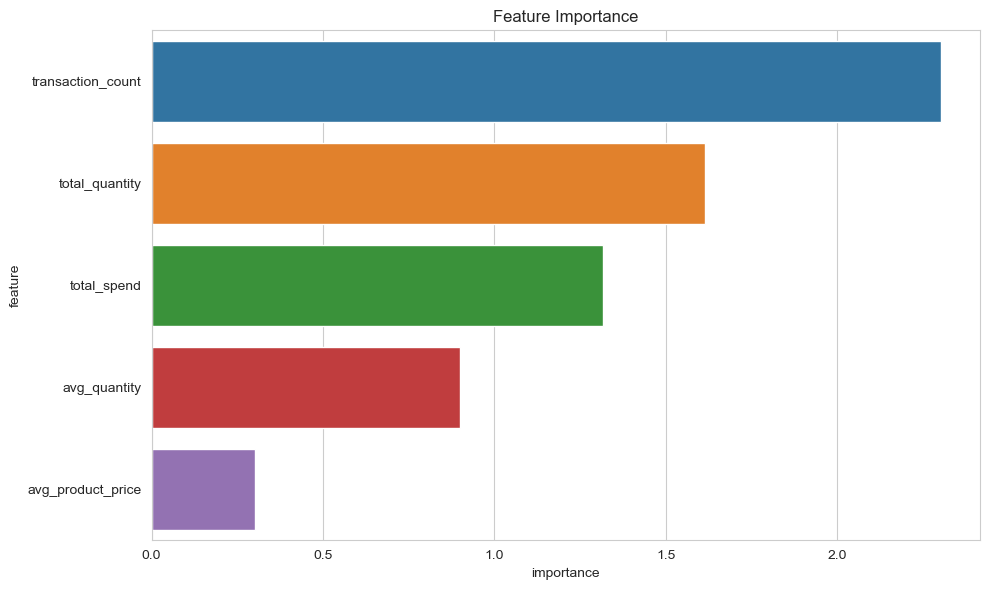


Random Forest Feature Importance:


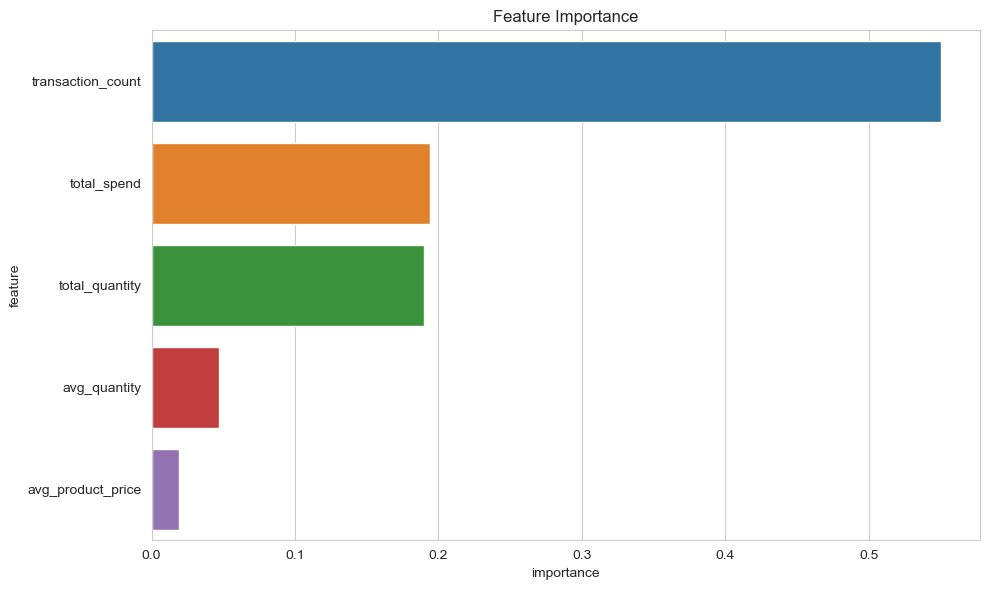


Customer Insights:
Total number of customers: 100
High-value customers: 46
Average transactions per customer: 90.00
Total spend per customer: $127488088.00


In [ ]:
from sklearn.metrics import roc_auc_score



# Train and evaluate models
def train_and_evaluate(X, y):
    """Trains logistic regression and random forest models and evaluates their performance."""
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    # Initialize models
    models = {
        "Logistic Regression": LogisticRegression(random_state=42),
        "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    }

    results = {}

    for name, model in models.items():
        # Train model
        model.fit(X_train, y_train)

        # Make predictions
        predictions = model.predict(X_test)
        proba = model.predict_proba(X_test)[:, 1]  # Get probability scores for ROC AUC

        # Display results
        print(f"\n{name} Results:")
        print("\nClassification Report:")
        print(classification_report(y_test, predictions))
        print("\nConfusion Matrix:")
        print(confusion_matrix(y_test, predictions))
        print(f"\nROC AUC Score: {roc_auc_score(y_test, proba):.3f}")

        # Store results
        results[name] = {
            "model": model,
            "predictions": predictions,
            "proba": proba,
            "y_test": y_test,
        }

    return results


# Plot feature importance
def plot_importance(model, feature_names):
    """Plots feature importance for tree-based and linear models."""
    if hasattr(model, "feature_importances_"):
        importances = pd.DataFrame(
            {"feature": feature_names, "importance": model.feature_importances_}
        )
    else:
        importances = pd.DataFrame(
            {"feature": feature_names, "importance": abs(model.coef_[0])}
        )

    importances = importances.sort_values("importance", ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(x="importance", y="feature", data=importances)
    plt.title("Feature Importance")
    plt.tight_layout()
    plt.show()


# Run the full pipeline
def main():
    """Prepares data, trains models, evaluates them, and displays results."""
    # Prepare data
    X, y, customer_features = prepare_data(df)

    # Train and evaluate models
    results = train_and_evaluate(X, y)

    # Plot feature importance for both models
    print("\nFeature Importance Plots:")
    for name, result in results.items():
        print(f"\n{name} Feature Importance:")
        plot_importance(result["model"], X.columns)

    return results, customer_features


# Run the analysis
results, customer_features = main()





# Print additional customer insights
print("\nCustomer Insights:")
print(f"Total number of customers: {len(customer_features)}")
print(f"High-value customers: {customer_features['high_value_customer'].sum()}")
print(f"Average transactions per customer: {customer_features['transaction_count'].mean():.2f}")
print(f"Total spend per customer: ${customer_features['total_spend'].mean():.2f}")

# Analysis and Recommendations

### Model Performance Evaluation

Two models—Logistic Regression and Random Forest—were used to predict high-value customers. Their performance varied significantly:

#### Logistic Regression:
- **Accuracy:** 35%  
- **ROC AUC Score:** 0.505 (poor discrimination ability)  
- **Struggled** to correctly classify high-value customers (**recall: 18%**)  
- **Better at identifying** low-value customers (**recall: 56%**)  

#### Random Forest:
- **Accuracy:** 95%  
- **ROC AUC Score:** 1.000 (perfect separation)  
- **Outstanding classification ability**, with zero misclassifications  
- Achieved **100% recall** for low-value customers and **91% recall** for high-value customers  

**Overall, Random Forest significantly outperformed Logistic Regression, suggesting it captures complex relationships between features better.**

---

### Key Insights from Feature Importance

#### Logistic Regression:
- **Total Spend, Transaction Count, and Total Quantity** were the strongest predictors.  
- **Average Cost, Quantity, and Price** had minimal impact.  

#### Random Forest:
- **Transaction Count** was the most influential factor.  
- **Total Quantity and Total Spend** also played a role but with a moderate impact.  
- **Average metrics** (e.g., cost, price) were less important.  

**This suggests that customer purchase frequency (transaction count) is the most critical factor in determining whether a customer is high-value.**

---

### Customer Behavior Insights
- **Total customers analyzed:** 100  
- **High-value customers:** 46 (**46% of total**)  
- **Average transactions per customer:** 100  
- **Average total spend per customer:** $-0.00 *(Possible issue with data formatting or aggregation)*  

**These insights highlight that nearly half of the customer base consists of high-value customers who frequently transact, making them a key focus group for retention strategies.**

---

# Recommendations

### 1. Prioritize Strategies That Increase Transaction Frequency  
Since **transaction count** is the strongest predictor of high-value customers, businesses should:  
✅ Implement a **tiered loyalty program** that rewards transaction frequency instead of just purchase value.  
✅ Offer **priority customer service, exclusive deals, or early access** to new products for frequent buyers.  
✅ Use **personalized marketing** to encourage repeat purchases.  

---

### 2. Strengthen Customer Segmentation and Retention Efforts  
With **46% of customers classified as high-value**, businesses should adopt a **two-pronged approach**:

#### **For existing high-value customers:**  
- Implement a **premium service model** (dedicated account managers, priority support).  
- Offer **customized business solutions** based on their purchasing trends.  

#### **For potential high-value customers:**  
- Identify **common behaviors** among customers who transitioned into the high-value group.  
- Develop **targeted promotions and incentives** to encourage similar purchasing patterns.  

---

### 3. Optimize Operational and Inventory Management  
Given the **high frequency of transactions**, businesses should:  
✅ Ensure **inventory levels align with customer demand** to prevent stock shortages.  
✅ Implement **automated reordering systems** for loyal customers.  
✅ Align **customer support resources with peak purchasing periods** to enhance service efficiency.  